In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
$

$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

$
\newcommand{\zerob}{\pmb{0}}
$


aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$

$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

Sum rule
----------

$$
p(X) = \displaystyle \sum_Y p(X, Y)
$$

Product Rule
------------
$$
\underbrace{p(X, Y)}_{\text{Joint}}
=
\underbrace{p(Y \mid X)}_{\text{Conditional}}
~\overbrace{p(X)}^{\text{Marginal}}
$$

In [4]:
def make_equal_plot():
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    new_lim = [min(x_lim[0],y_lim[0]), max(x_lim[1], y_lim[1])]
    plt.xlim(new_lim)
    plt.ylim(new_lim)

In [57]:
def find_angle_vector(eigen_vector):
    return math.atan2(eigen_vector[1], eigen_vector[0])

In [66]:
a = [[0, 45, 90],[90, 135, 180],[180, 225, 270],[270, 315, 360]]
for aa in a:
    print([xx % 180 for xx in aa])

[0, 45, 90]
[90, 135, 0]
[0, 45, 90]
[90, 135, 0]


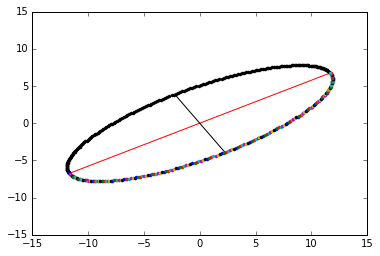

In [206]:
def plot_evector(eigen_val, eigen_vector, scaling, color='k'):
    vector = eigen_val*scaling*eigen_vector
    plt.plot([-vector[0,0], vector[0,0]],
         [-vector[0,1], vector[0,1]],
         color+'-', lw=1)

def plot_ellipse(angle=30, a=9, b=3, scaling=1.5):
    angle_rad = angle/180*math.pi
    R = np.matrix([[math.cos(angle_rad), -math.sin(angle_rad)],
                   [math.sin(angle_rad),  math.cos(angle_rad)]])
    plot_evector(a, np.matrix([math.cos(angle_rad),  math.sin(angle_rad)]), scaling=scaling, color='r')
    plot_evector(b, np.matrix([-math.sin(angle_rad), math.cos(angle_rad)]), scaling=scaling)
    pts_circle = np.matrix([[scaling*a*math.cos(theta),scaling*b*math.sin(theta)] for theta in np.linspace(0,math.pi,200)]).T
    pts = R * pts_circle
    plt.plot(pts[0,:], pts[1,:],'.k',lw='2')
    plt.plot(-pts[0,:], -pts[1,:],'.')
    plt.xlim([-15,15]); plt.ylim([-15,15])

def plot_ellipse2(angle=30, a=9, b=3):
    plot_ellipse(angle=30, a=9,b=3)
    plt.show()
    
interactive(plot_ellipse2, angle=(0,180), a=(1,10),b=(1,10))

In [321]:
m = [0, 0]
cov = [[1,0],[0,9]]
x = np.random.multivariate_normal(m, cov, 5*10**3)
print(x.shape)

(5000, 2)


In [311]:
print(x[:5,:])
print(x[1,1])

[[-0.95992059 -6.16609823]
 [ 0.65188994  0.71988431]
 [-0.56594345 -2.0437308 ]
 [ 1.69019707  0.51854571]
 [ 0.23261302 -2.56406239]]
0.719884305748


In [312]:
x=[[4.0,4.2,3.9,4.3,4.1],[2.0,2.1,2.0,2.1,2.2],[0.60,0.59,0.58,0.62,0.63]]
x=np.matrix(x).T
print(x)
print(np.mean(x,0))
print(x[1,2])

[[ 4.    2.    0.6 ]
 [ 4.2   2.1   0.59]
 [ 3.9   2.    0.58]
 [ 4.3   2.1   0.62]
 [ 4.1   2.2   0.63]]
[[ 4.1    2.08   0.604]]
0.59


In [287]:
mean_mine = np.mean(x,0)
print(mean_mine)
# cov_mine = np.zeros((3,3))
# for ix in range(3):
#     for iy in range(ix,3):
#         for n in range(x.shape[0]):
#             cov_mine[ix,iy] += (x[n,ix]-mean_mine[0,ix])*(x[n,iy]-mean_mine[0,iy])
#             cov_mine[iy,ix] = cov_mine[ix,iy]
            
# cov_mine /= 4.
cov_mine = np.zeros((2, 2))
for ix in range(50):
    cov_mine[0,0] += (x[ix,0]-mean_mine[0])*(x[ix,0]-mean_mine[0])
    cov_mine[0,1] += (x[ix,0]-mean_mine[0])*(x[ix,1]-mean_mine[1])
    cov_mine[1,1] += (x[ix,1]-mean_mine[1])*(x[ix,1]-mean_mine[1])
    cov_mine[1,0] = cov_mine[0, 1]
cov_mine = cov_mine/49.0
print('cov')
print(cov_mine)
evals_mine, evectors_mine = np.linalg.eig(cov_mine)
print(evals_mine)
print(evectors_mine)
print(np.cov(x.T))
# evals_mine, evectors_mine = np.linalg.eig(np.linalg.inv(cov_mine))
# print(evals_mine)

[ 0.07105898 -0.18459886]
cov
[[ 1.2016983  -0.11431592]
 [-0.11431592  7.47344367]]
[ 1.19961534  7.47552663]
[[-0.99983404  0.01821806]
 [-0.01821806 -0.99983404]]
[[ 1.2016983  -0.11431592]
 [-0.11431592  7.47344367]]


In [332]:
m = [0, 0]
cov = [[1,2],[2,9]]
x = np.random.multivariate_normal(m, cov, 5*10**3)
print(x.shape)

# find the mean of the points
mean_sample = np.mean(x,0)
cov_sample = np.cov(x.T)
print('sample covariance')
print(cov_sample)
print(np.linalg.inv(cov_sample))
evals, evectors = np.linalg.eig(cov_sample)
print('evals',evals)
print('eigen vectors')
print(evectors)
print(evectors.shape)
print(type(evectors))

(5000, 2)
sample covariance
[[ 1.00954032  1.99759813]
 [ 1.99759813  9.04171891]]
[[ 1.75991735 -0.38882072]
 [-0.38882072  0.19650108]]
evals [ 0.54016738  9.51109186]
eigen vectors
[[-0.97348776 -0.22873911]
 [ 0.22873911 -0.97348776]]
(2, 2)
<class 'numpy.ndarray'>


In [334]:
S = np.linalg.inv(cov_sample)
print('S')
print(S)
aa,bb,cc = np.linalg.svd(S)
print('SVD')
print(aa)
print(bb)
print(cc)
print()
x1 = np.matrix([[0,1],
                [1,0],
                [evals[0],evals[1]],
                [evals[1],evals[0]],
                [1./evals[0],1./evals[1]],
                [1./evals[1],1./evals[0]]
               ])
for xx1 in x1:
    print()
    print(xx1)
    print(S*xx1.T)
    print((xx1 * S * xx1.T)[0,0])

S
[[ 1.75991735 -0.38882072]
 [-0.38882072  0.19650108]]
SVD
[[-0.97348776  0.22873911]
 [ 0.22873911  0.97348776]]
[ 1.85127803  0.1051404 ]
[[-0.97348776  0.22873911]
 [ 0.22873911  0.97348776]]


[[ 0.  1.]]
[[-0.38882072]
 [ 0.19650108]]
0.196501080346

[[ 1.  0.]]
[[ 1.75991735]
 [-0.38882072]]
1.75991735393

[[ 0.54016738  9.51109186]]
[[-2.7474596 ]
 [ 1.65891156]]
14.2939721816

[[ 9.51109186  0.54016738]]
[[ 16.52870735]
 [ -3.59196607]]
155.265791026

[[ 1.85127803  0.1051404 ]]
[[ 3.21721557]
 [-0.69915505]]
5.88245108413

[[ 0.1051404   1.85127803]]
[[-0.53477684]
 [ 0.32289737]]
0.541546155148


angle -3.137640098688658


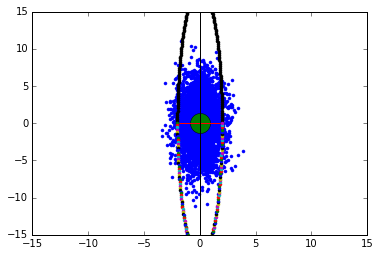

In [320]:
plt.plot(x[:,0], x[:,1],'.')
make_equal_plot()

plt.plot(mean_sample[0], mean_sample[1], 'og', MarkerSize=20)
plot_ellipse(a=1, b=9, angle=0, scaling=2)
print('angle', find_angle_vector(evectors[:,0]))
plt.show()

In [133]:
def plot_evectors(eigen_vals, eigen_vectors, scaling=3):
    [plot_evector(eigen_vals[ix], eigen_vectors[:,ix], scaling) for ix in range(2)]

In [130]:
a= [[1,2],[3,4]]
np.matrix(a)[:,1].shape

(2, 1)

Curve Fitting
===============

Given
* data points: $\xb = (x_1, x_2, \cdots, x_N)^T$
* target values $\tb = (t_1, t_2, \cdots, t_N)^T$

Assume that, given a value x, the target t has a Gaussian distribution with mean $y(x, \wb)$. hence

$$
p(t \mid x, \wb, \beta) = \Nl{t}{y(x,\wb)}{\inv{\beta}}
$$

The uncertainty of the target value is $\beta$

if IID, then
$$
\arrthree{
p(\tb \mid \xb, \wb, \beta)
&=
\prodnN \Nl{t_n}{y(x_n, \wb)}{\inv{\beta}}
}
$$

The log likelihood is given by
$$
\ln p(\tb \mid \xb, \wb, \beta)
=
-\frac{\beta}{2} \sumnN
\left\{
  y(x_n,\wb) - t_n
\right\}^2
+ \frac{N}{2} \ln{\beta}
- \frac{N}{2} \ln{2\pi}
$$

## Max Likelihood


If we consider diff wrt **w**, the last two terms dont matter. Hence, this becomes equivalent to minimizing the sum-of-squares error function.

Thus, the sum-of-squares arises as a consequence of maximizing the likelihood under the assumption of a Gaussian noise distribution.

max wrt $\beta$

$$
\arrthree{
-\half \sumnN
\left\{
  y(x_n, \wb) - t_n
\right\}^2
+ \frac{N}{2} \fracone{\beta}
& = 0
\\
\fracone{\beta_{ML}}
=
\frac{1}{N} \sumnN
\left\{
  y(x_n, \wb) - t_n
\right\}^2
}
$$

Having determined $\wb, \beta$, predictions can be expressed as a prob. dist. over t, rather than a point estimate.

$$
p(t \mid x, \ml{\wb}, \ml{\beta})
=
\Nl{t}{y(x, \ml{\wb})}{\inv{\ml{\beta}}}
$$

### with prior

If we introduce a Gaussian prior for **w**, we have
$$
p(\wb \mid \alpha)
=
\Nl{\wb}{\zerob}{\inv{\alpha}\I}
=
\left(
  \frac{\alpha}{2\pi}
\right)^{(M+1)/2}
\EXP{-\frac{\alpha}{2} \wt \wb}
$$

where $\alpha$ is the precision and M+1 is the #elements in **w** for a $M^{th}$ order polynomial.

The variables such as $\alpha$ which control the dist. of the model parameters are called hyperparameters.

The posterior now becomes
$$
p(\wb \mid \xb, \tb, \alpha, \beta)
\propto
p(\tb \mid \xb, \wb, \beta) ~p(\wb \mid \alpha)
$$

Since the determination of the parameters now happens by max. the posterior, it is called *maximum posterior* or *MAP*.

Taking the max of the log of the posterior is given as the min of 
$$
\frac{\beta}{2}
\sumnN
\left\{
  y(x_n, \wb) - t_n
\right\}^2
+ \frac{\alpha}{2} \wt \wb
$$

Thus the posterior is equiv to min the regularized sum of sequares error function with the regularization parameter given by $\lambda = \frac{\alpha}{\beta}$

## Bayesian approach

Bayesian treatment corresponds to the consistent application of the sum and product rules of probability. The predictive distribution is given by

$$
p(t \mid x, \xb, \tb)
=
\int p(t \mid x, \wb) ~p(\wb \mid \xb, \tb) ~d\wb
$$

That is, instead of given out using a single value for the parameter $\wb$, we integrate over all vals of **w**. This is in effect weighing the prediction given by a particular value of **w** by how likely the value is as predicted by the fucking data

$$
\arrthree{
p(t \mid x, \xb, \tb)
&=
\Nl{t}{m(x)}{s^2(x)}
\\
m(x)
&=
\beta \phi(x)^T \Sb \sumnN \phi(x_n) t_n
\\
s^2(x)
&=
\inv{\beta} + \phi(x)^T \Sb \phi(x)
\\
\inv{\Sb}
&=
\alpha \I + \beta \sumnN \phi(x_n) \phi(x_n)^T
}
$$

The variance or the uncertainty has two terms
* the first term is the same as the ml estimate
* the second term depends on the location of $\phi(x)$

This can be explained using SVD

$$
\inv{\Sb} = \Ub \Db \Ut
$$
where
$$
\arrthree{
\Ub
&=
\mat{\vb_1 & \vb_2 & \cdots & \vb_D}
&\commentgray{eigen vector matrix}
\\
\Db 
&=
\text{diag}(\lambda_1,\cdots,\lambda_D)
& \commentgray{diag of eigenvalues}
}
$$


If we assume **U** to be orthonormal, then $\inv{\Ub} = \Ut$. Hence

$$
\Sb = \Ub \inv{\Db} \Ut
$$

Now, 
$$
\arrthree{
\xt \Sb \xb
&=
\xt \left(\Ub \inv{\Db}\Ut\right) \xb
\\
&=
\left( \Ut \xb \right)^T \Db^{-1/2} \Db^{-1/2}
\left( \Ut \xb \right)
\\
&=
\left( \Db^{-1/2} \Ut \xb \right)^T
\left( \Db^{-1/2} \Ut \xb \right)
\\
&=
\zt \zb
}
$$

where $\zb = \left( \Db^{-1/2} \Ut \xb \right)$, duh

* The sexy part about this is it is a dot product.  
* moreover, $\Ut \xb$ is nothing but the projection of the vector $\xb$ on to the eigenvectors.
  * Each of these projections will be high the more \xb is aligned to that particular eigenvector
* after the projection, we get a vector of projections or "distances" from the center of mass
* these values are scaled down by the sqrt of eigenvalue along each projection. this has an amazing consequence
  * the longer the axis is, farther a point can be along it than along a shorter axis, capturing the spread of the data